## Laboratorio 2 – Clasificación
HELLEN CARRANZA

In [1]:
# Importar librerías necesarias
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, precision_recall_curve,
    roc_curve, auc
)


In [2]:
os.makedirs("Leaves", exist_ok=True)


In [3]:
from google.colab import files
uploaded = files.upload()


Saving l7nr008.tif to l7nr008.tif
Saving l5nr001.tif to l5nr001.tif


In [25]:
import os
os.listdir()


['.config', 'Leaves', 'sample_data']

In [29]:
import shutil

# Verifica si el archivo existe antes de moverlo
if os.path.exists("l7nr008.tif"):
    shutil.move("l7nr008.tif", "Leaves/l7nr008.tif")
else:
    print("Archivo l7nr008.tif no encontrado. ¿Lo subiste correctamente?")

if os.path.exists("l5nr001.tif"):
    shutil.move("l5nr001.tif", "Leaves/l5nr001.tif")
else:
    print("Archivo l5nr001.tif no encontrado. ¿Lo subiste correctamente?")


Archivo l7nr008.tif no encontrado. ¿Lo subiste correctamente?
Archivo l5nr001.tif no encontrado. ¿Lo subiste correctamente?


In [34]:
myimagedir = 'Leaves'

selected_images = {
    'l7nr008.tif': 1,  # Clase positiva
    'l5nr001.tif': 0   # Clase negativa
}

image_data = []
labels = []

for filename, label in selected_images.items():
    img_path = os.path.join(myimagedir, filename)
    if os.path.exists(img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  # Tamaño similar a MNIST
        image_data.append(img.flatten())
        labels.append(label)

# Convertir a arrays
X = np.array(image_data, dtype=np.float32)
y = np.array(labels, dtype=np.uint8)

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)



In [35]:
# Ruta a carpeta
myimagedir = "Leaves"

# Etiquetas personalizadas
selected_images = {
    'l7nr008.tif': 1,  # Clase positiva (por ejemplo, hoja A)
    'l5nr001.tif': 0   # Clase negativa (otra hoja)
}

image_data = []
labels = []

# Leer y procesar imágenes
for filename, label in selected_images.items():
    img_path = os.path.join(myimagedir, filename)
    if os.path.exists(img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  # Tamaño similar a MNIST
        image_data.append(img.flatten())
        labels.append(label)

# Convertir a arrays
X = np.array(image_data, dtype=np.float32)
y = np.array(labels, dtype=np.uint8)

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamos y probamos con todo (porque solo hay 2 muestras)
X_train = X_scaled
X_test = X_scaled
y_train = y
y_test = y


In [38]:
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Verificamos si hay 2 clases antes de usar [:, 1]
if knn.predict_proba(X_test).shape[1] == 2:
    y_scores_knn = knn.predict_proba(X_test)[:, 1]
else:
    y_scores_knn = knn.predict_proba(X_test)[:, 0]  # Solo una clase posible

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

if rf.predict_proba(X_test).shape[1] == 2:
    y_scores_rf = rf.predict_proba(X_test)[:, 1]
else:
    y_scores_rf = rf.predict_proba(X_test)[:, 0]


REPORTE DE CLASIFICACIÓN (Random Forest)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



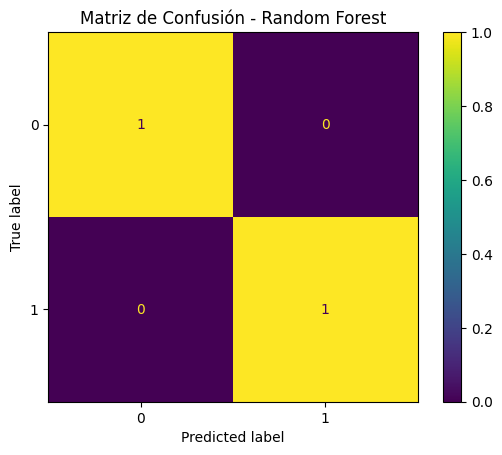

In [39]:
print("REPORTE DE CLASIFICACIÓN (Random Forest)")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.title("Matriz de Confusión - Random Forest")
plt.show()


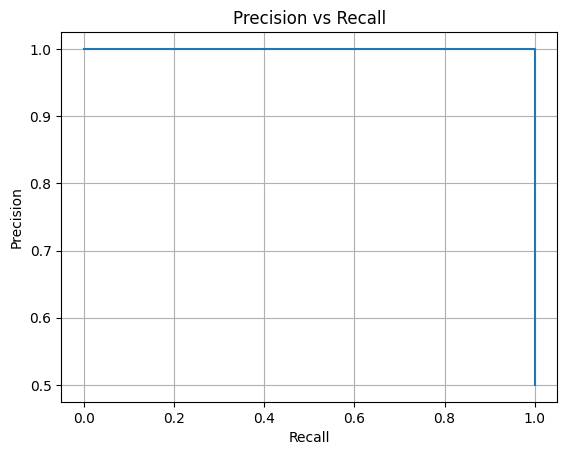

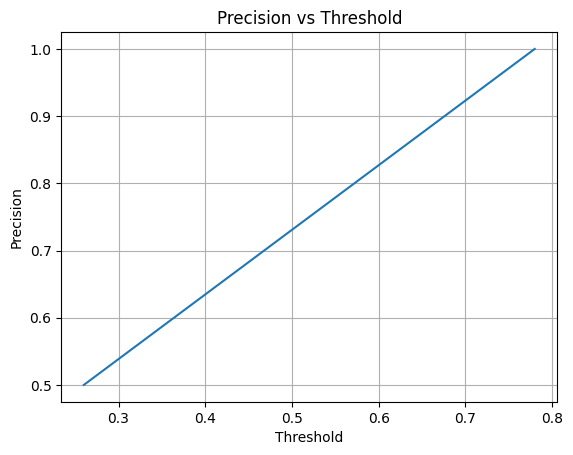

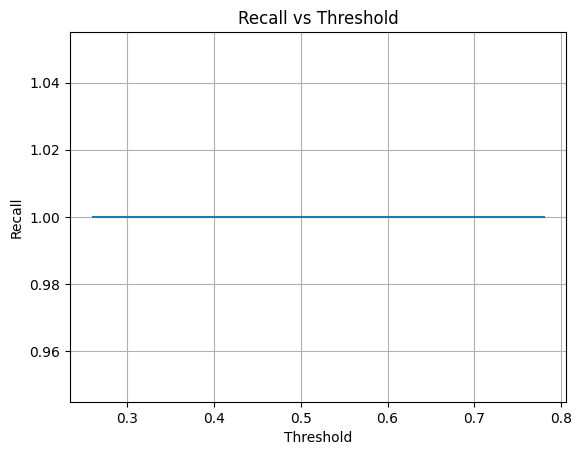

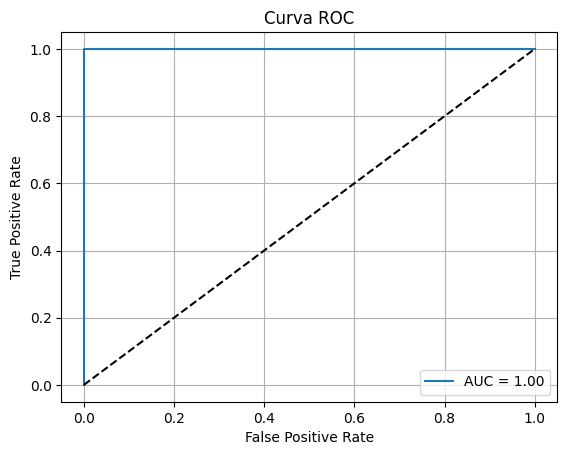

In [40]:
# Precision, Recall, Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_rf)

# Precision vs Recall
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.grid()
plt.show()

# Precision vs Threshold
plt.plot(thresholds, precision[:-1])
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshold')
plt.grid()
plt.show()

# Recall vs Threshold
plt.plot(thresholds, recall[:-1])
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Threshold')
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()
